<a href="https://colab.research.google.com/github/Ash-Stat/An-Si-Hyun/blob/data/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
housing=pd.read_csv('./cal_housing.csv',encoding='utf-8-sig')



In [2]:
housing

,-122.230000,37.880000,41.000000,880.000000,129.000000,322.000000,126.000000,8.325200,452600.000000
0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
1,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
2,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
3,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
4,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0
...,...,...,...,...,...,...,...,...,...
20634,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20635,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20636,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20637,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [3]:
zz=housing.columns

zz=pd.DataFrame(zz)
zz=zz.T


In [5]:
zz.columns=col
housing.columns=col

In [6]:
housing=pd.concat([zz,housing],axis=0)
housing

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.230000,37.880000,41.000000,880.000000,129.000000,322.000000,126.000000,8.325200,452600.000000
0,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500
1,-122.24,37.85,52,1467,190,496,177,7.2574,352100
2,-122.25,37.85,52,1274,235,558,219,5.6431,341300
3,-122.25,37.85,52,1627,280,565,259,3.8462,342200
...,...,...,...,...,...,...,...,...,...
20634,-121.09,39.48,25,1665,374,845,330,1.5603,78100
20635,-121.21,39.49,18,697,150,356,114,2.5568,77100
20636,-121.22,39.43,17,2254,485,1007,433,1.7,92300
20637,-121.32,39.43,18,1860,409,741,349,1.8672,84700


In [7]:
housing=housing.reset_index()

In [4]:
col=['longitude','latitude','housingMedianAge','totalRooms','totalBedrooms','population','households','medianIncome','medianHouseValue']

In [8]:
housing=housing.drop(['index'],axis=1)
housing

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.230000,37.880000,41.000000,880.000000,129.000000,322.000000,126.000000,8.325200,452600.000000
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374,845,330,1.5603,78100
20636,-121.21,39.49,18,697,150,356,114,2.5568,77100
20637,-121.22,39.43,17,2254,485,1007,433,1.7,92300
20638,-121.32,39.43,18,1860,409,741,349,1.8672,84700


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   longitude         20640 non-null  object
 1   latitude          20640 non-null  object
 2   housingMedianAge  20640 non-null  object
 3   totalRooms        20640 non-null  object
 4   totalBedrooms     20640 non-null  object
 5   population        20640 non-null  object
 6   households        20640 non-null  object
 7   medianIncome      20640 non-null  object
 8   medianHouseValue  20640 non-null  object
dtypes: object(9)
memory usage: 1.4+ MB


In [10]:
housing.iloc[0]=housing.iloc[0].astype(float) #데이터 타입 변경
housing

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41,880,129,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374,845,330,1.5603,78100
20636,-121.21,39.49,18,697,150,356,114,2.5568,77100
20637,-121.22,39.43,17,2254,485,1007,433,1.7,92300
20638,-121.32,39.43,18,1860,409,741,349,1.8672,84700


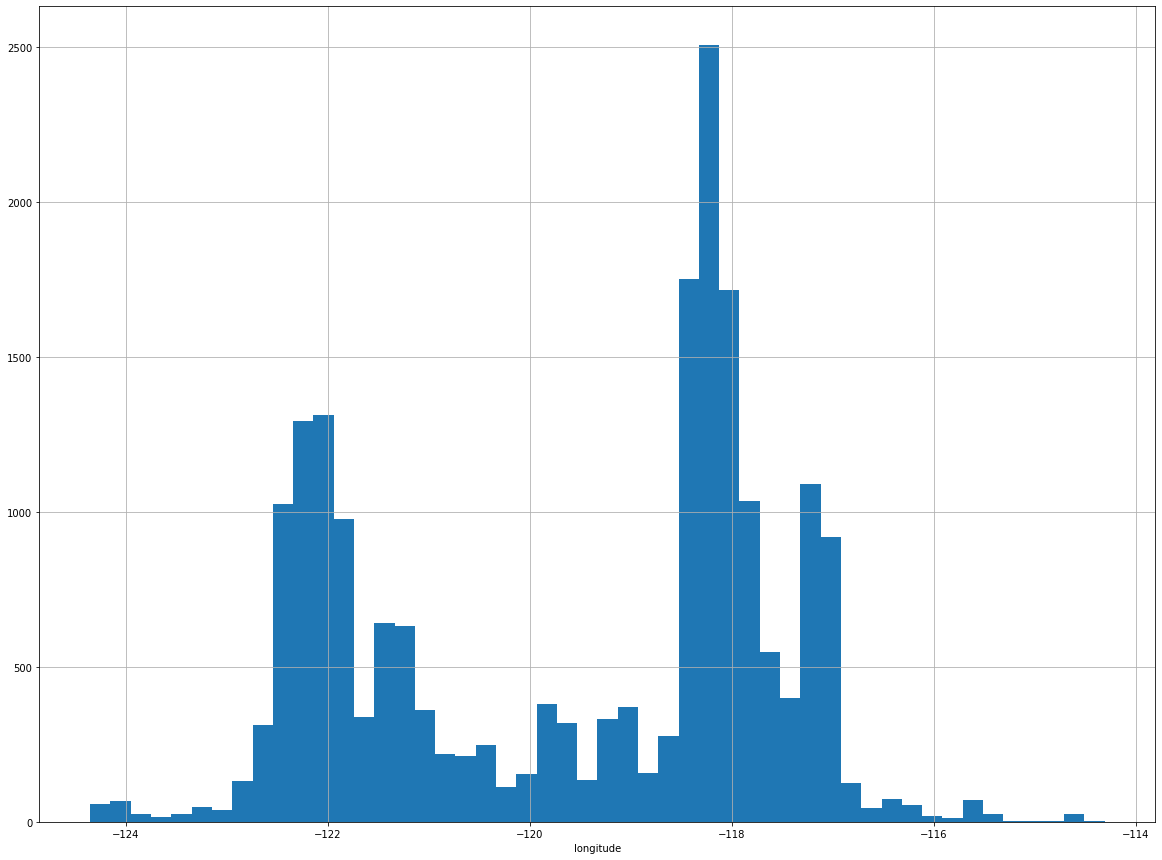

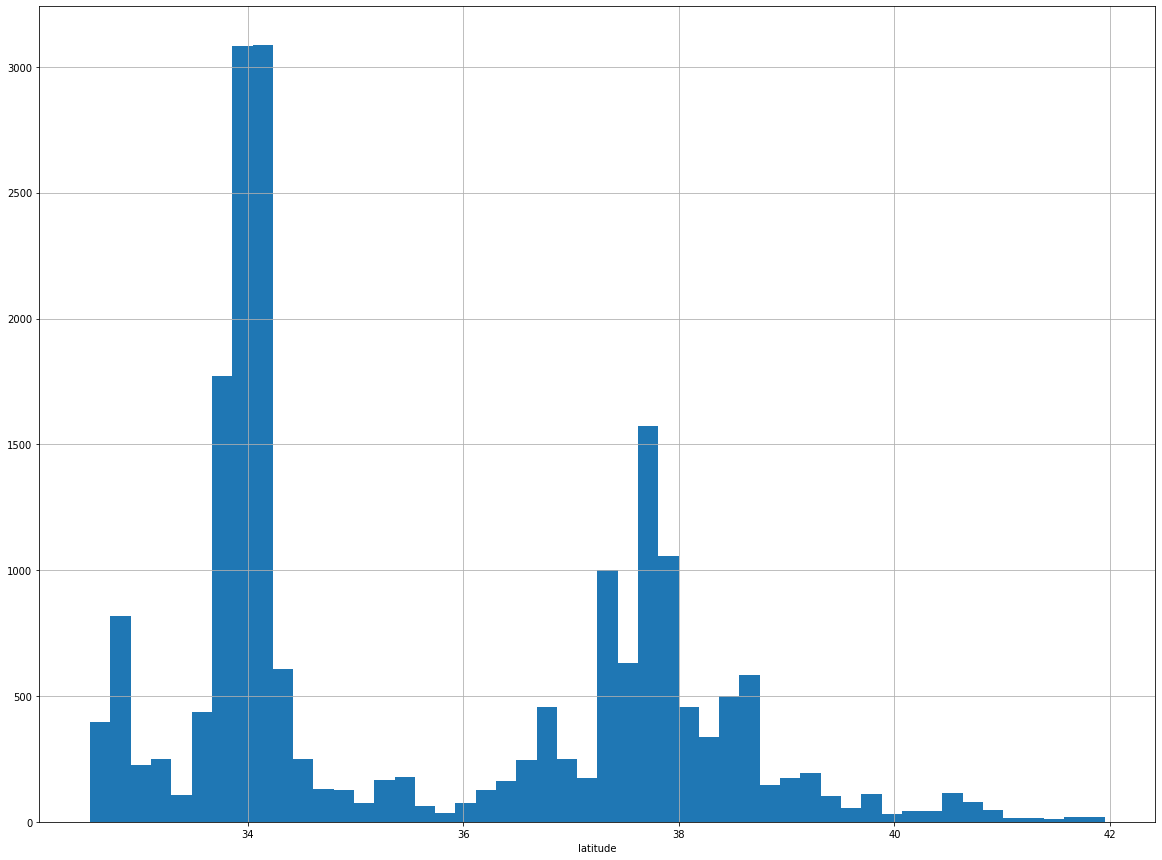

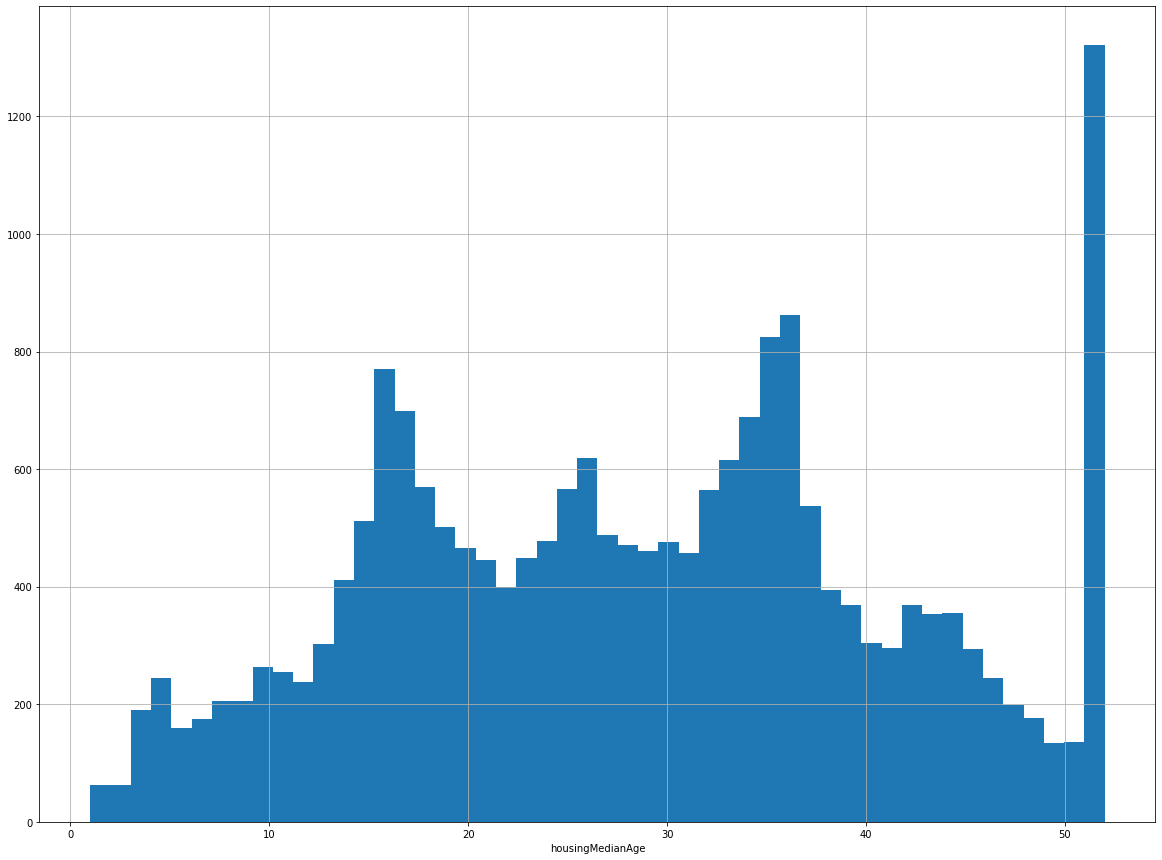

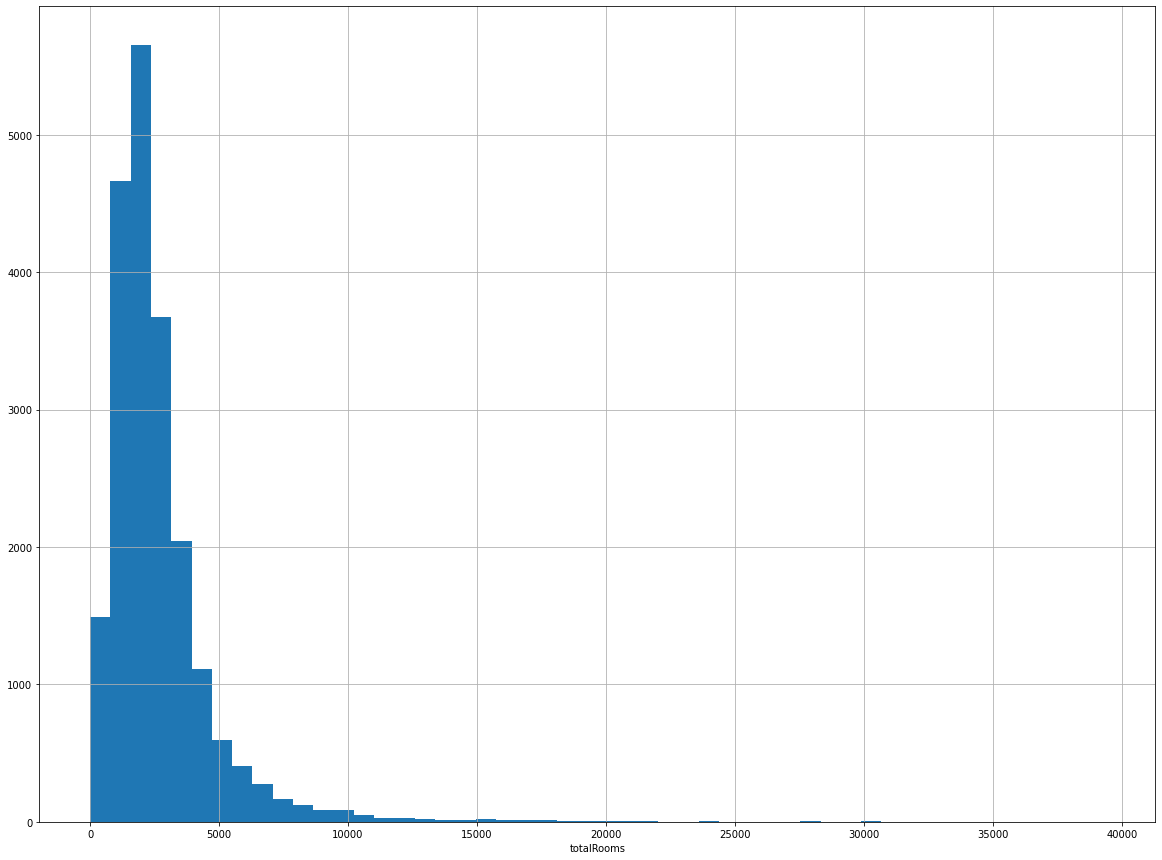

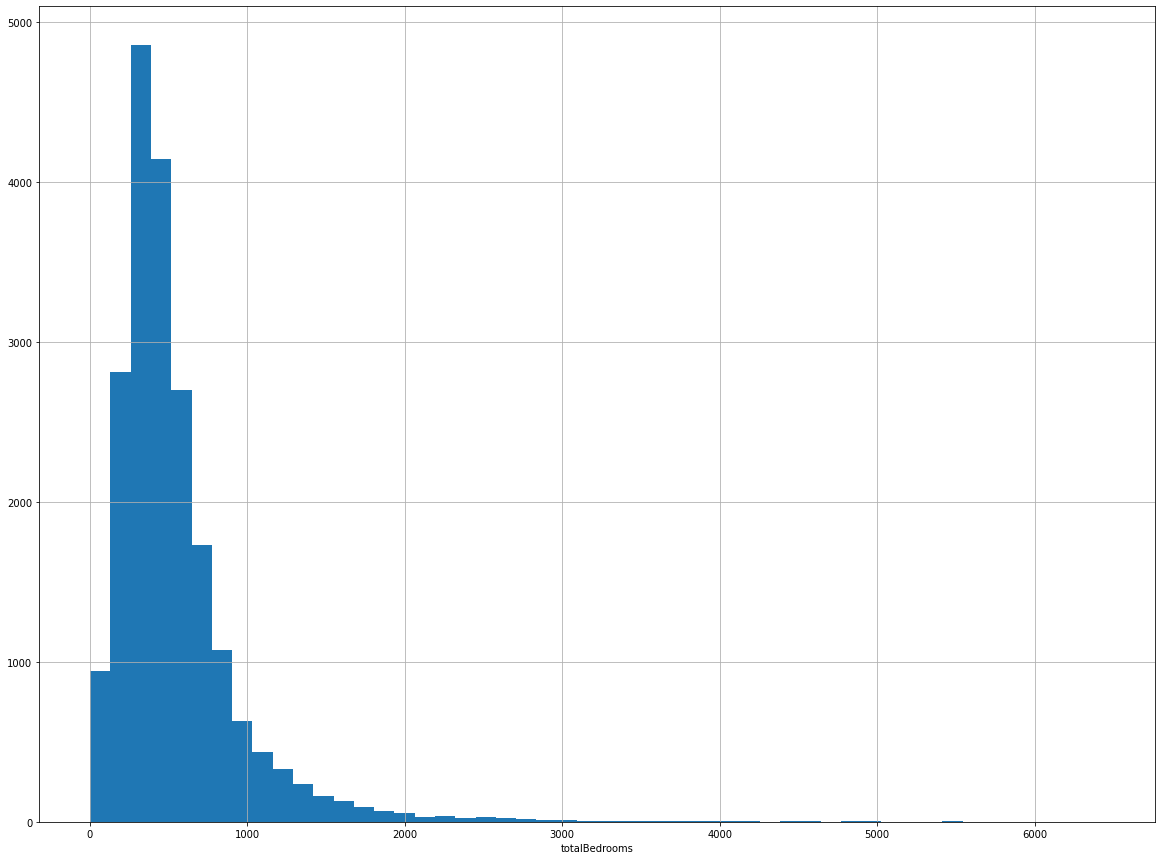

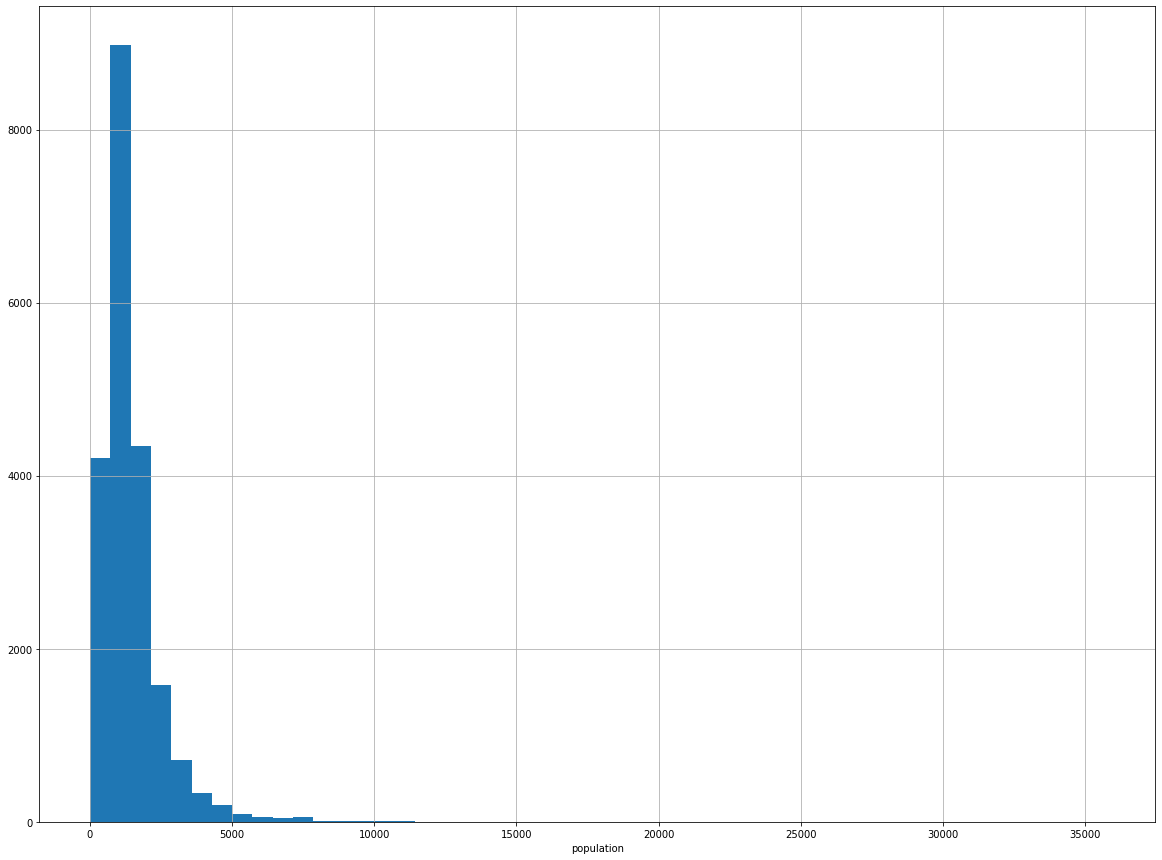

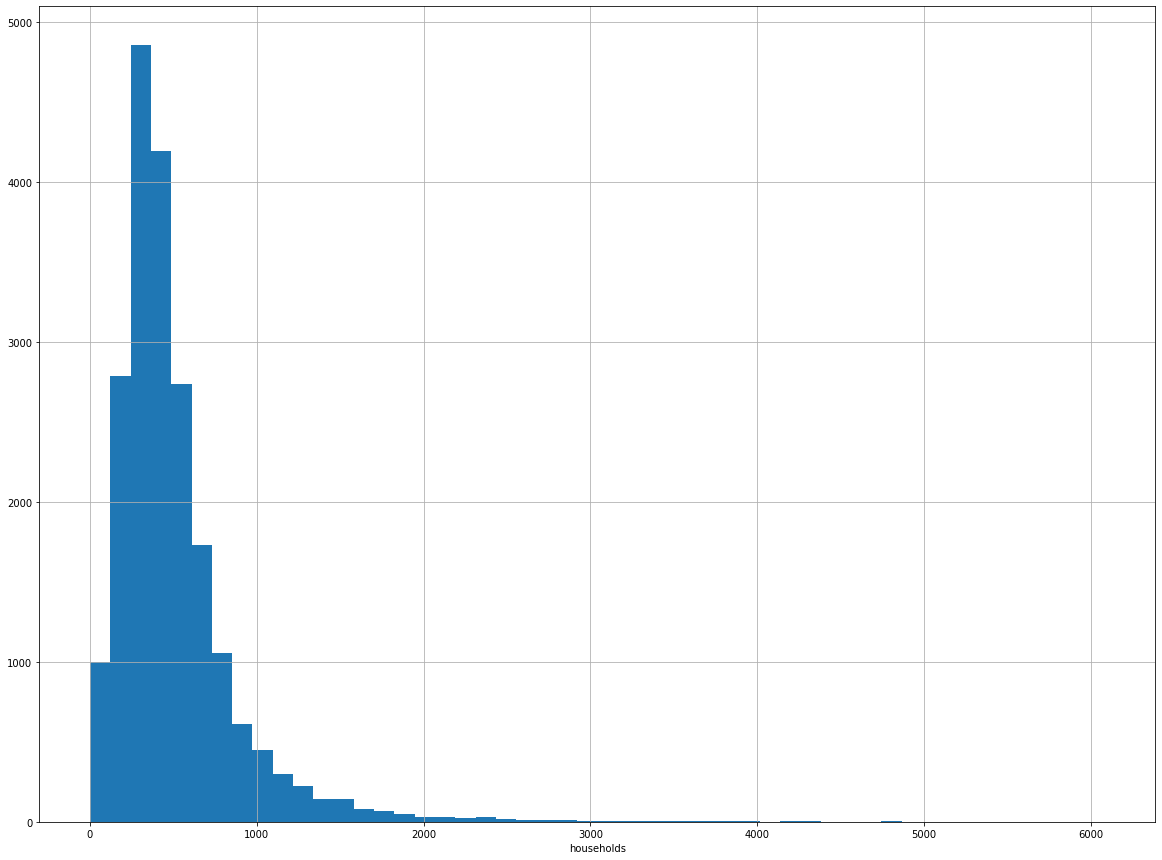

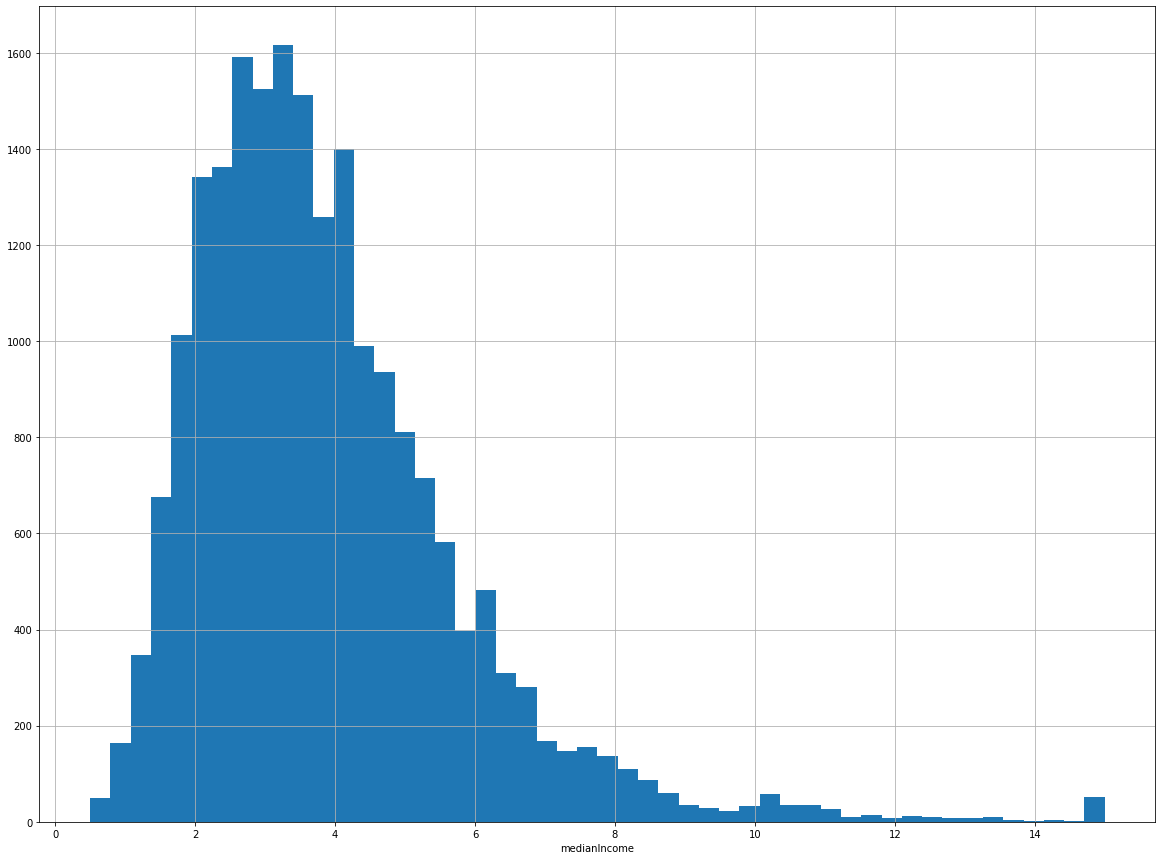

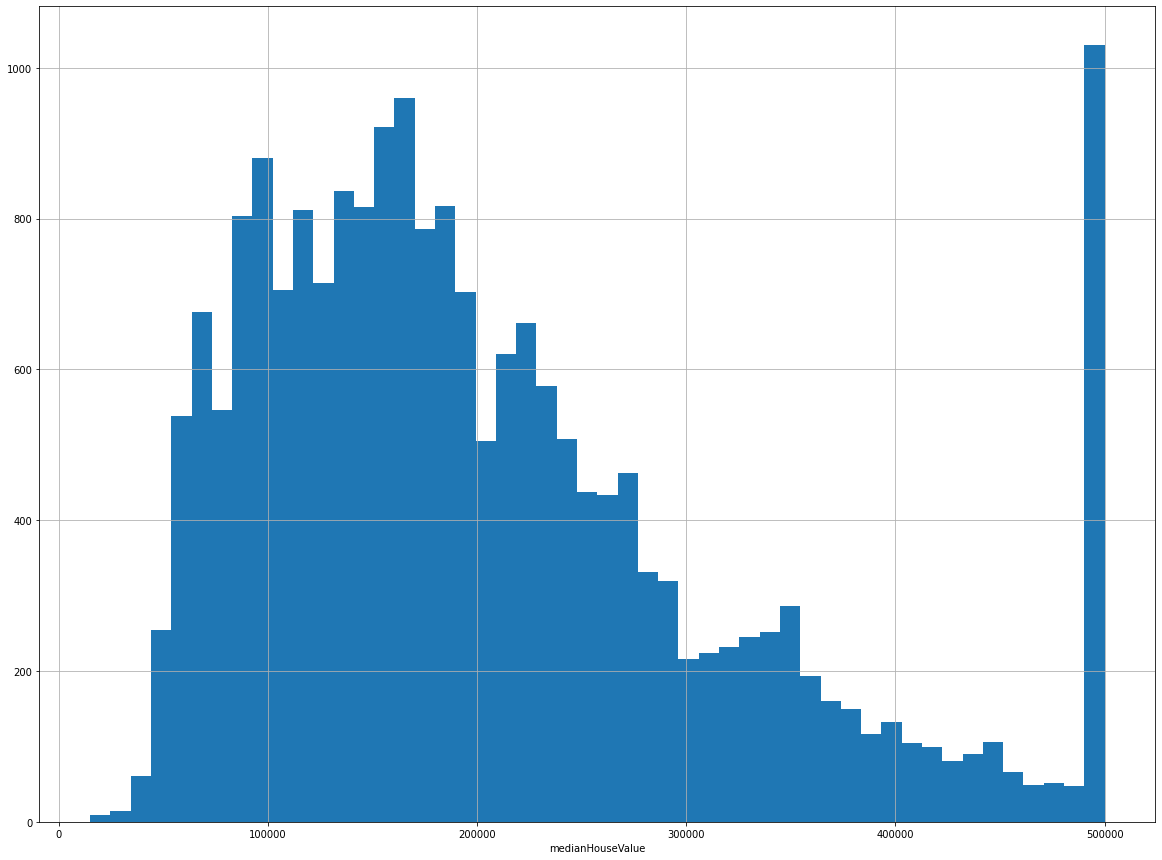

In [24]:
#데이터의 형태를 검토해보기 위해 숫자형 특성을 히스토그램으로 그려본다.
import seaborn as sns
import matplotlib.pyplot as plt
for colcol in housing:
  plt.xlabel(colcol)
  housing[colcol].hist(bins=50,figsize=(20,15))
  plt.show()

  #히스토그램 오른쪽 끝이 심하게 솟구치면서 끝난다는것은
  #최대값 혹은 최소값이 한정되어 있다는 상황으로 짐작이 가능하다.
    #그런데, 이것이 문제가 될지 안될지는 충분한 고려가 필요하다.
    #예를들어서, 고객으로부터 상한선을 넘어가더라도 정확한 예측값이 필요하다 or 아니다. 등


#---------------------------------------------------------------------------------------------#

#한계값을 넘어가더라도 정확한 예측값이 필요하다면 다음과 같은 두 가지 방법이 있다.

#한계값 밖의 구역에 대한 정확한 레이블을 구한다.

#훈련 세트에서 이런 구역을 제거한다.($500,000가 넘는 값에 대한 예측은 평가 결과가 매우 나쁠 것 이므로 테스트 세트에서도 제거 한다.)

#특성의 스케일 필요

# 히스토 그램의 꼬리가 두꺼운 경우가 많다. 가운데에서 왼쪽보다 오른쪽으로 더 멀리 뻗어있다.
#이런 형태는 일부 머신러닝 알고리즘에서 패턴을 찾기 어렵게 만드므로, 후에 종 모양의 분포가 되도록 변형시켜야 한다.



In [25]:
#테스트 세트를 만들때 테스트세트를 절대 쳐다보면안된다.

#왜냐하면 우리 뇌는 과적합되기 매우 쉬운 패턴감지 시스템이기 때문에, 테스트 세트를 미리 살펴보면, 겉으로 드러난 어떤 패턴에 속아 특정 머신러닝 모델을 선택하게 될지도 모른다.
#이 테스트 세트로 일반화 오차를 추정하면 매우 낙관적인 추정이 되며 시스템을 론칭했을 때 기대한 성능이 나오지 않을 것이다.
#이를 데이터 스누핑 편향 이라고 한다.

In [29]:
#테스트 데이터 분리 과정

import numpy as np
def test_train(data,ratio):
  shuffled=np.random.permutation(len(data))
  test_set_size=int(len(data)) * ratio
  test_indices=shuffled[:test_set_size]
  train_indices=shuffled[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]
train_set, test_set= test_train(housing, 0.2)
print(len(train_set))
print(len(test_set))

TypeError: ignored

In [52]:
import numpy as np
a=np.random.permutation(len(housing))  #데이터 개수만큼 섞고
print(a)
print(len(a))
b=int(len(housing)) * 0.2 #데이터 개수의 몇퍼센트를 이용할건지 테스트로 쓸껀지
c=a[:int(b)]  #그 테스트 데이터 까지 출력
d=a[int(b):] # 그 이후엔 트레인 데이터
print(c)
print(d)
print(housing.iloc[c])

#이렇게 트레인, 테스트 데이터를 나눴으면 이대로 쭉 가야한다.
#이런거는 실행시킬떄마다 바뀌니까 잘 저장해 놓는 것이 중요하다.

test_set=pd.DataFrame(c)
train_set=pd.DataFrame(d)

[14932   793   312 ... 14717   290 10600]
20640
[14932   793   312 ... 17438 14531  1765]
[19117  7918  6530 ... 14717   290 10600]
      longitude latitude  ... medianIncome medianHouseValue
14932   -116.99    32.64  ...       3.9519           193500
793     -122.09    37.64  ...       5.2838           172600
312     -122.19    37.77  ...       2.0469            89300
9244    -120.05    36.98  ...       2.5288            61800
2624    -124.02    40.72  ...       3.8095           119900
...         ...      ...  ...          ...              ...
13794    -117.5    34.66  ...       2.0184            84900
6085    -117.87    34.09  ...       5.2405           220000
17438   -120.45    34.64  ...       3.7778           150000
14531   -117.13    32.92  ...       5.5036           192300
1765    -122.33    37.95  ...       4.0927           142600

[4128 rows x 9 columns]


In [53]:
test_set

,0
0,14932
1,793
2,312
3,9244
4,2624
...,...
4123,13794
4124,6085
4125,17438
4126,14531


In [54]:
train_set

,0
0,19117
1,7918
2,6530
3,13217
4,11029
...,...
16507,17278
16508,17722
16509,14717
16510,290


In [57]:
#사이킷런으로 서브셋 나누기
#train_test_split

#난수 초깃값을 설정할 수 있는 random_state 매개변수가 있다.
#행의 개수가 같은 여러 개의 데이터셋을 넘겨서 같은 인덱스를 기반으로 나눌 수 있다.
from sklearn.model_selection import train_test_split

train_set1,test_set1=train_test_split(housing, test_size=0.2, random_state=42)

In [58]:
train_set1

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
14196,-117.03,32.71,33,3126,627,2300,623,3.2596,103000
8267,-118.16,33.77,49,3382,787,1314,756,3.8125,382100
17445,-120.48,34.66,4,1897,331,915,336,4.1563,172600
14265,-117.11,32.69,36,1421,367,1418,355,1.9425,93400
2271,-119.8,36.78,43,2382,431,874,380,3.5542,96500
...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35,1330,201,658,217,6.37,229200
11964,-117.43,34.02,33,3084,570,1753,449,3.05,97800
5390,-118.38,34.03,36,2101,569,1756,527,2.9344,222100
860,-121.96,37.58,15,3575,597,1777,559,5.7192,283500


In [59]:
test_set1

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
20046,-119.01,36.06,25,1505,367,1392,359,1.6812,47700
3024,-119.46,35.14,30,2943,697,1565,584,2.5313,45800
15663,-122.44,37.8,52,3830,1142,1310,963,3.4801,500001
20484,-118.72,34.28,17,3051,505,1705,495,5.7376,218600
9814,-121.93,36.62,34,2351,440,1063,428,3.725,278000
...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16,3165,482,1351,452,4.605,263300
16623,-120.83,35.36,28,4323,886,1650,705,2.7266,266800
18086,-122.05,37.31,25,4111,538,1585,568,9.2298,500001
2144,-119.76,36.77,36,2507,466,1227,474,2.785,72300


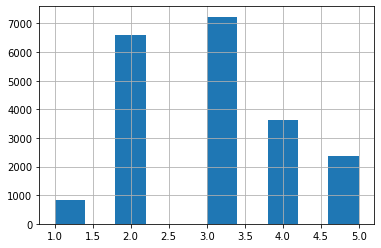

In [67]:
#어떤 타겟변수를 예측할때 전문가가 중간 소득이 중간 주택가격을 예측하는 것에 있어서 매우 중요하다 했을때
#이 경우 테스트 세트가 전체 데이터셋에 있는 여러 소득 카테고리를 잘 대표해야 한다.
#중간 소득이 연속적인 숫자형 특성이므로 소득에 대한 카테고리 특성을 만들어야 한다.
#중간 소득은 대부분 1.5 ~6사이에 있지만 일부는 6을 넘기도 한다.
#계층별로 데이터셋에 충분한 샘플 수가 있어야하고, 그렇지 않으면 계층의 중요도를 추정하는데 편향이 발생한다.
#즉, 너무 많은 계층으로 나누면 안되고, 각 계층은 충분히 커야한다.

#pd.cut()을 이용하여 소득 카테고리 만들기

housing['income_cut']=pd.cut(housing['medianIncome'], bins=[0,1.5,3.0,4.5,6,np.inf], labels=[1,2,3,4,5])
housing['income_cut'].hist()

In [69]:
print(housing['income_cut'])

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cut, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]


In [70]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing, housing['income_cut']):
  #strat_train_set=housing.loc[train_index]
  #strat_test_set=housing.loc[test_index]
  print(train_index)

[17606 18632 14650 ... 13908 11159 15775]


In [71]:
print(split)

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)
